### CV ASSIGNMENT

### Importing Libraries

In [86]:
import cv2 as cv # For reading and writing images
import matplotlib.pyplot as plt # For displaying images
import numpy as np # for array manipulation

### Functions to perform tasks

In [95]:
def show_image(image):
    '''Function to convert display image'''
    plt.imshow(image)
    plt.axis("off")

In [96]:
def convert_to_grayscale(image):
    '''Function to convert image to grayscale'''
    gray_scale = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            gray_scale[i,j] = sum(gray_scale[i,j])/3
    return gray_scale

In [89]:
def dimensions(image):
    return image.shape[0],image.shape[1]

In [113]:
def split_bgr(image):
    b,g,r = cv.split(image)
    return b,g,r

In [114]:
def extract_middle_100(image):
    mid_height = image.shape[0]//2
    mid_width = image.shape[1]//2
    return image[mid_height-50:mid_height+50,mid_width-50:mid_width+50]

In [117]:
def set_zero(image):
    new_image = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i%20==0 and j%10==0:
                new_image[i,j] = 0
    return new_image

In [118]:
def flip_vertical_and_combine(image):
    vert_flip = cv.flip(image,0)
    big_image = np.array(np.concatenate((image,image,image[:,:20]),axis=1))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]*2+20):
            if j<image.shape[1]:
                big_image[i,j] = image[i,j]
            elif j>image.shape[1]+20:
                big_image[i,j] = vert_flip[i,j%980]
            else:
                big_image[i,j] = 1
    return big_image

#### Read image

In [21]:
image = cv.imread("2437349-pikachu.png")

#### Display Image

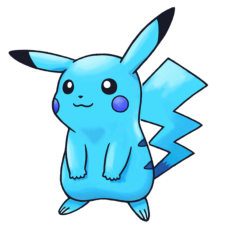

In [23]:
show_image(image)

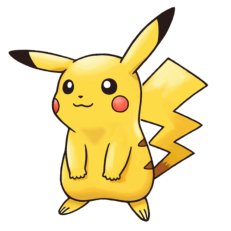

In [100]:
show_image(cv.cvtColor(image, cv.COLOR_BGR2RGB))

#### Show dimensions of image

In [101]:
image.shape

(960, 960, 3)

In [102]:
height,width = dimensions(image)

In [103]:
print(f"Height: {height}\nWidth: {width}")

Height: 960
Width: 960


#### Convert image to grayscale

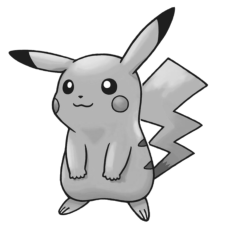

In [104]:
show_image(convert_to_grayscale(image))

#### Split image into channels

In [107]:
b,g,r = split_bgr(image)
print(b)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


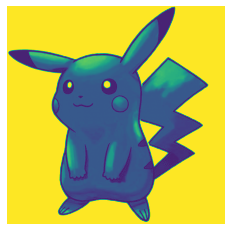

In [108]:
show_image(b)

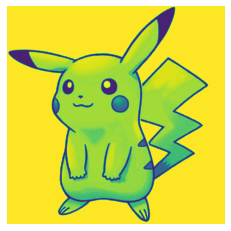

In [109]:
show_image(g)

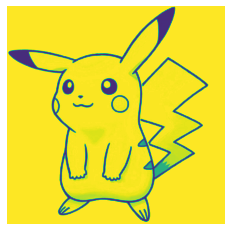

In [110]:
show_image(r)

#### Extract middle 100 pixels

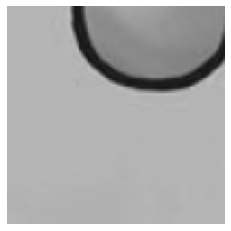

In [115]:
show_image(extract_middle_100(convert_to_grayscale(image)))

#### Set every 10th pixel horizontally 0 and 20th pixel vertically 0

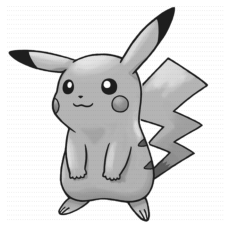

In [116]:
show_image(set_zero(convert_to_grayscale(image)))

#### Flip image vertically

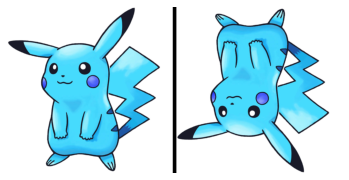

In [120]:
show_image(flip_vertical_and_combine(image))

#### Write image to file

In [121]:
cv.imwrite("new_image.png",flip_vertical_and_combine(image))

True